In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
data_path = "datasets/mobile_prices.csv"
df = pd.read_csv(data_path)

In [3]:
X = df.loc[:, df.columns[:-1]]
Y = df.price_range

In [4]:
X = np.array(X)
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [5]:
Y = np.array(Y).squeeze()
Y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

### Linear Discriminator

In [4]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
linear_discriminant_model = LinearDiscriminantAnalysis()
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scores = cross_val_score(linear_discriminant_model, X, Y, scoring="accuracy", cv=cross_val)

In [6]:
print(f"Accuracy: {np.mean(scores) * 100 : .2f}% (+-{np.std(scores) * 100 : .2f}%)")

Accuracy:  94.39% (+- 1.10%)


### Gaussian Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
gaussian_model = GaussianNB()
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scores = cross_val_score(gaussian_model, X, Y, scoring="accuracy", cv=cross_val)

In [9]:
print(f"Accuracy: {np.mean(scores) * 100 : .2f}% (+-{np.std(scores) * 100 : .2f}%)")

Accuracy:  80.66% (+- 2.40%)


### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
random_forest_model = RandomForestClassifier(n_estimators=1000, min_samples_split=3)
cross_val = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scores = cross_val_score(random_forest_model, X, Y, scoring="accuracy", cv=cross_val)

In [13]:
print(f"Accuracy: {np.mean(scores) * 100 : .2f}% (+-{np.std(scores) * 100 : .2f}%)")

Accuracy:  88.42% (+- 1.95%)


## Data Visualization (Correlation Matrix, tSNE)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.manifold import TSNE
X_reduced_embedded = TSNE(n_components=2, learning_rate='auto', init="random").fit_transform(X)
X_reduced_embedded = pd.DataFrame(X_reduced_embedded, columns=["tSNE-x", "tSNE-y"])
df = df.join(X_reduced_embedded)

X_reduced = linear_discriminant_model.transform(X)
X_reduced_embedded = TSNE(n_components=2, learning_rate='auto', init="random").fit_transform(X_reduced)
X_reduced_embedded = pd.DataFrame(X_reduced_embedded, columns=["tSNE-x-reduced", "tSNE-y-reduced"])
df = df.join(X_reduced_embedded)

<AxesSubplot:>

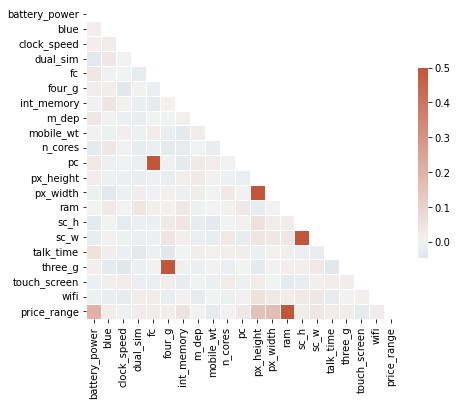

In [19]:
corr = df.loc[:, df.columns[:-4]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(ncols=1)
fig.set_size_inches(7, 7)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs)

<AxesSubplot:xlabel='tSNE-x', ylabel='tSNE-y'>

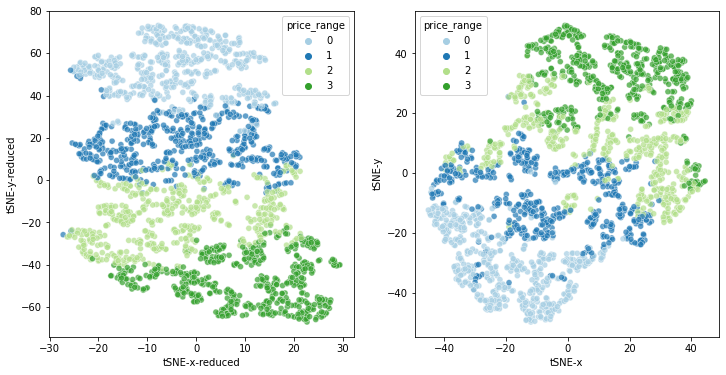

In [20]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(12, 6)
sns.scatterplot(
    x="tSNE-x-reduced", y="tSNE-y-reduced",
    hue="price_range",
    data=df,
    palette="Paired",
    legend="full",
    alpha=0.7,
    ax=axs[0]
)
sns.scatterplot(
    x="tSNE-x", y="tSNE-y",
    hue="price_range",
    data=df,
    palette="Paired",
    legend="full",
    alpha=0.7,
    ax=axs[1]
)

### Plot Results

In [21]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train, X_test = np.array(df_train.loc[:, df.columns[:-5]]), np.array(df_test.loc[:, df.columns[:-5]])
Y_train, Y_test = np.array(df_train.price_range).squeeze(), np.array(df_test.price_range).squeeze()

In [22]:
linear_discriminant_model.fit(X_train, Y_train)
pred_linear_discriminator = linear_discriminant_model.predict(X_test)
gaussian_model.fit(X_train, Y_train)
pred_gaussian_model = gaussian_model.predict(X_test)
random_forest_model.fit(X_train, Y_train)
pred_random_forest = random_forest_model.predict(X_test)

In [23]:
print(f"Linear Discriminator Accuracy: {linear_discriminant_model.score(X_test, Y_test) * 100 : .2f}%")
print(f"Gaussian Naive Bayes Accuracy: {gaussian_model.score(X_test, Y_test) * 100 : .2f}%")
print(f"Random Forest Classifier Accuracy: {random_forest_model.score(X_test, Y_test) * 100 : .2f}%")

Linear Discriminator Accuracy:  95.75%
Gaussian Naive Bayes Accuracy:  81.25%
Random Forest Classifier Accuracy:  90.25%


In [24]:
linear_discriminator_correct = pred_linear_discriminator == Y_test
gaussian_model_correct = pred_gaussian_model == Y_test
random_forest_correct = pred_random_forest == Y_test


In [25]:
df_test = df_test.join(pd.DataFrame(linear_discriminator_correct, columns=["linear_discriminator_correct"], index=df_test.index))
df_test = df_test.join(pd.DataFrame(gaussian_model_correct, columns=["gaussian_model_correct"], index=df_test.index))
df_test = df_test.join(pd.DataFrame(random_forest_correct, columns=["random_forest_correct"], index=df_test.index))

<AxesSubplot:xlabel='tSNE-x', ylabel='tSNE-y'>

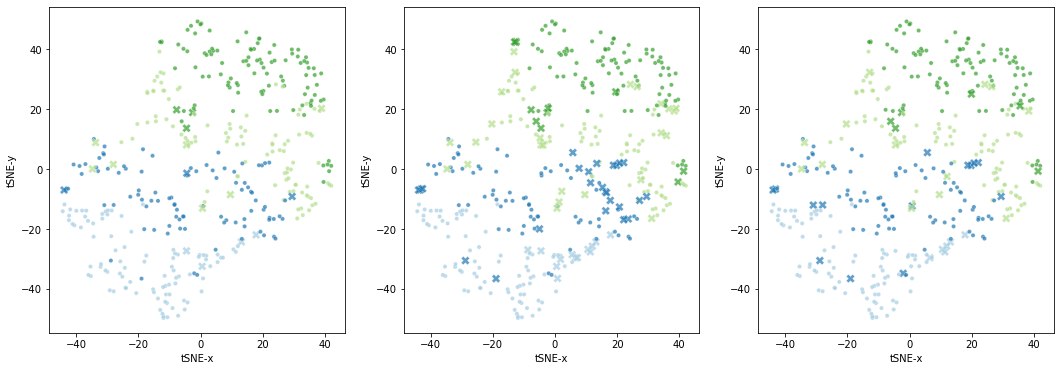

In [26]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
sns.scatterplot(
    x="tSNE-x", y="tSNE-y",
    hue="price_range",
    style="linear_discriminator_correct",
    size="linear_discriminator_correct",
    style_order=[True, False],
    data=df_test,
    palette="Paired",
    legend=False,
    alpha=0.7,
    ax=axs[0]
)
sns.scatterplot(
    x="tSNE-x", y="tSNE-y",
    hue="price_range",
    style="gaussian_model_correct",
    size="gaussian_model_correct",
    style_order=[True, False],
    data=df_test,
    palette="Paired",
    legend=False,
    alpha=0.7,
    ax=axs[1]
)
sns.scatterplot(
    x="tSNE-x", y="tSNE-y",
    hue="price_range",
    style="random_forest_correct",
    size="random_forest_correct",
    style_order=[True, False],
    data=df_test,
    palette="Paired",
    legend=False,
    alpha=0.7,
    ax=axs[2]
)

In [27]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, ax, title=""):
    y_pred = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        # print(y_test_dummies[:, i])
        # print(y_pred[:, i])
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC {title}')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    ax.legend(loc="best")
    ax.grid(alpha=.4)

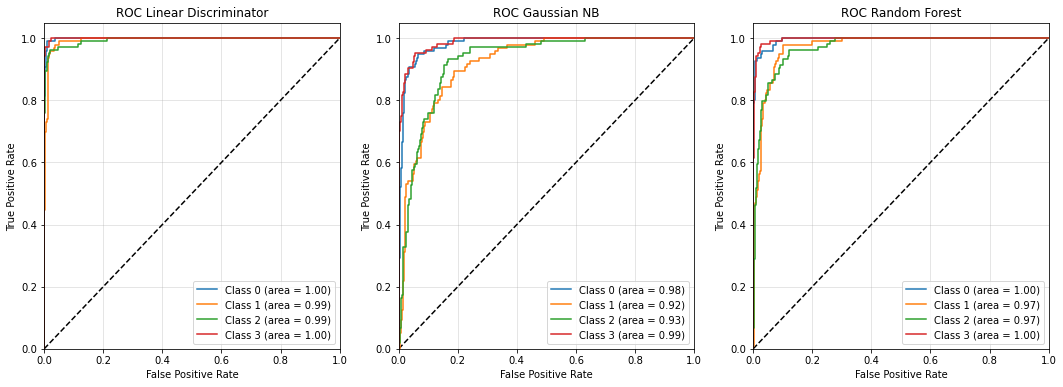

In [28]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
plot_multiclass_roc(linear_discriminant_model, X_test, Y_test, n_classes=4, ax=axs[0], title="Linear Discriminator")
plot_multiclass_roc(gaussian_model, X_test, Y_test, n_classes=4, ax=axs[1], title="Gaussian NB")
plot_multiclass_roc(random_forest_model, X_test, Y_test, n_classes=4, ax=axs[2], title="Random Forest")